# Creating a Portfolio Using Modern Portfolio Theory

## Gathering Data and Giving a Snapshot

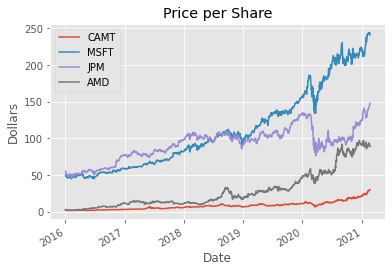

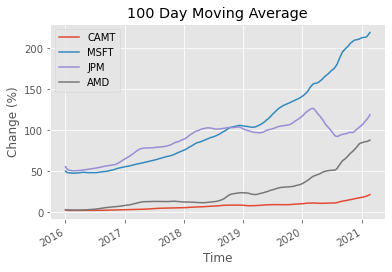

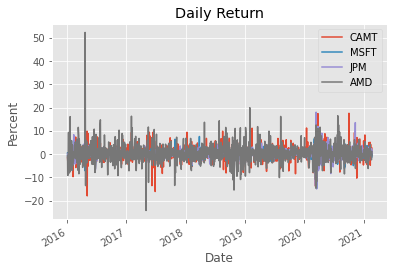

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import datetime as dt

style.use('ggplot')

# Define and collect stock data
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

stocks = [
    {
        'ticker': 'CAMT'
    },
    {
        'ticker': 'MSFT'
    },
    {
        'ticker': 'JPM'
    },
    {
        'ticker': 'AMD'
    }
]

data = pd.DataFrame()

for stock in stocks:
    data[stock['ticker']] = web.DataReader(stock['ticker'], 'yahoo', start, end)['Adj Close']

# Plot per share price of each stock
data.plot()
plt.title('Price per Share')
plt.ylabel('Dollars')
plt.xlabel('Date')
plt.show()

# 100 day moving average
ma = data.rolling(window = 100, min_periods = 0).mean()
ma.plot()
plt.title('100 Day Moving Average')
plt.ylabel('Change (%)')
plt.xlabel('Time')
plt.show()

# Plot the return data
r = data.apply(pd.Series.pct_change) * 100
r.plot()
plt.title('Daily Return')
plt.ylabel('Percent')
plt.xlabel('Date')
plt.show()

The return data will be used to analyze the portfolio due to it being stationary data.

## Separate Stocks

In [2]:
# CAMT
camt = pd.DataFrame(data['CAMT'])
camt.rename(columns = {'CAMT':'Price'}, inplace = True)
camt['Return'] = camt['Price'].pct_change()*100
camt = camt.dropna()

# MSFT
msft = pd.DataFrame(data['MSFT'])
msft.rename(columns = {'MSFT':'Price'}, inplace = True)
msft['Return'] = msft['Price'].pct_change()*100
msft = msft.dropna()

# JPM
jpm = pd.DataFrame(data['JPM'])
jpm.rename(columns = {'JPM':'Price'}, inplace = True)
jpm['Return'] = jpm['Price'].pct_change()*100
jpm = jpm.dropna()

# AMD
amd = pd.DataFrame(data['AMD'])
amd.rename(columns = {'AMD':'Price'}, inplace = True)
amd['Return'] = amd['Price'].pct_change()*100
amd = amd.dropna()

## Define Parameters for Analysis

In [3]:
# Return and Standard Deviation
r_camt = camt['Return'].mean()
sigma_camt = camt['Return'].std()

r_msft = msft['Return'].mean()
sigma_msft = msft['Return'].std()

r_jpm = jpm['Return'].mean()
sigma_jpm = jpm['Return'].std()

r_amd = amd['Return'].mean()
sigma_amd = amd['Return'].std()

# Define a function to randomly form portfolio weights
def xlist(n):
    x = []
    for i in range(n):
        x.append(random.random())
    return [j/sum(x) for j in x]

# Define the portfolio
def port(x1,x2,x3,x4,r1,r2,r3,r4,s1,s2,s3,s4,rho12,rho13,rho14,rho23,rho24,rho34):
    port_return = x1*r1 + x2*r2 + x3*r3 + x4*r4
    port_risk = (x1**2*s1**2 + x2**2*s2**2 + x3**2*s3**2 + x4**2*s4**2 + 2*x1*x2*s1*s2*rho12 + 
                2*x1*x3*s1*s3*rho13 + 2*x1*x4*s1*s4*rho14 + 2*x2*x3*s2*s3*rho23 + 2*x2*x4*s2*s4*rho24 +
                2*x3*x4*s3*s4*rho34)**.5
    return [port_return, port_risk]

# Define parameters
r1 = r_camt
r2 = r_msft
r3 = r_jpm
r4 = r_amd
s1 = sigma_camt
s2 = sigma_msft
s3 = sigma_jpm
s4 = sigma_amd
rho12 = np.corrcoef(camt['Return'], msft['Return'])[0,1]
rho13 = np.corrcoef(camt['Return'], jpm['Return'])[0,1]
rho14 = np.corrcoef(camt['Return'], amd['Return'])[0,1]
rho23 = np.corrcoef(msft['Return'], jpm['Return'])[0,1]
rho24 = np.corrcoef(msft['Return'], amd['Return'])[0,1]
rho34 = np.corrcoef(jpm['Return'], amd['Return'])[0,1]

## Monte Carlo Analysis

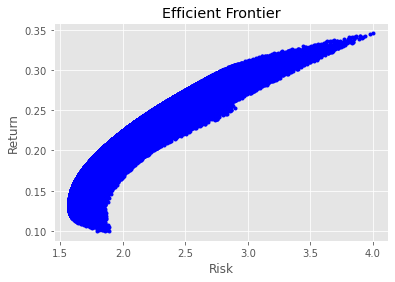

In [5]:
# Portfolio outputs
risk = []
returns = []
portlist = []

# Monte Carlo simulation on portfolio
for i in range(1000000):
    [x1,x2,x3,x4] = xlist(4)
    portlist.append([x1,x2,x3,x4])
    portfolio = port(x1,x2,x3,x4,r1,r2,r3,r4,s1,s2,s3,s4,rho12,rho13,rho14,rho23,rho24,rho34)
    risk.append(portfolio[1])
    returns.append(portfolio[0])
    
plt.plot(risk, returns, 'b.')
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.show()